# Assignment 2

## Angelo Rosace



In [2]:
import pandas as pd
import seaborn as sn
import random as rand
import matplotlib.pyplot as plt 

### Assignment 2: exercise 1

First of all we will need to read the file containing the result of the experiment.

In [3]:
diet_and_atp = pd.read_csv("diet_and_atp.tsv", sep = "\t", header = [0])
diet_and_atp

,Protein,Carbohydrates,Fat,ATP
0,1.95,6.92,0.02,9.44
1,0.64,2.65,0.15,4.04
2,1.82,0.98,0.21,3.72
3,1.80,4.69,0.23,7.54
4,0.93,4.22,0.02,5.70
...,...,...,...,...
94,1.83,5.69,0.15,8.60
95,1.77,6.33,0.07,8.66
96,1.15,4.88,0.27,6.80
97,1.30,3.91,0.03,5.46


Above is the table containing the data that came from the experiment done in the lab.
In order to have a deeper understanding of the data we will plot each of the distributions of the different values.

<function matplotlib.pyplot.show(*args, **kw)>

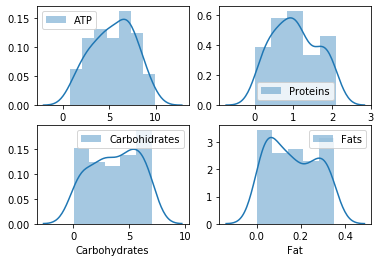

In [4]:
atp = diet_and_atp["ATP"]
prot = diet_and_atp["Protein"]
carb = diet_and_atp["Carbohydrates"]
fat = diet_and_atp["Fat"]

plt.subplot(2,2,1)
sn.distplot(atp, label="ATP")
plt.legend()
plt.subplot(2,2,2)
sn.distplot(prot, label="Proteins")
plt.legend()
plt.subplot(2,2,3)
sn.distplot(carb, label="Carbohidrates")
plt.legend()
plt.subplot(2,2,4)
sn.distplot(fat, label="Fats")
plt.legend()
plt.show

By taking a look to the graphs for all the variables individually we can recognize some sort of normal distribution for all of them.

Besides from the data, the experiment tells us also that the model describing our data is defined by this function:
**atp = a * Protein + b * Carbohidrates + c * Fat + ε**

This information plus the information we get by inspecting the data leads us to the next step: 
Implement a Markov Chain Monte Carlo algorithm in order to infer the unknown parameters of the model

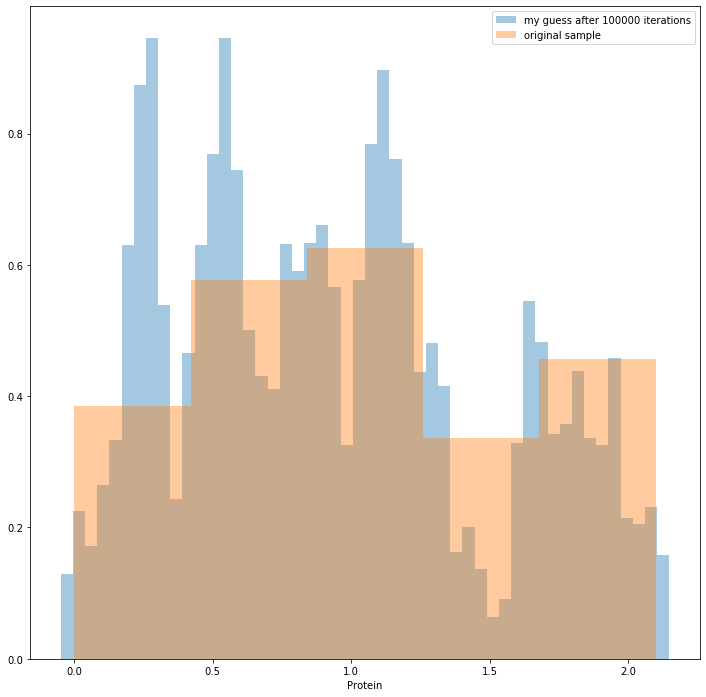

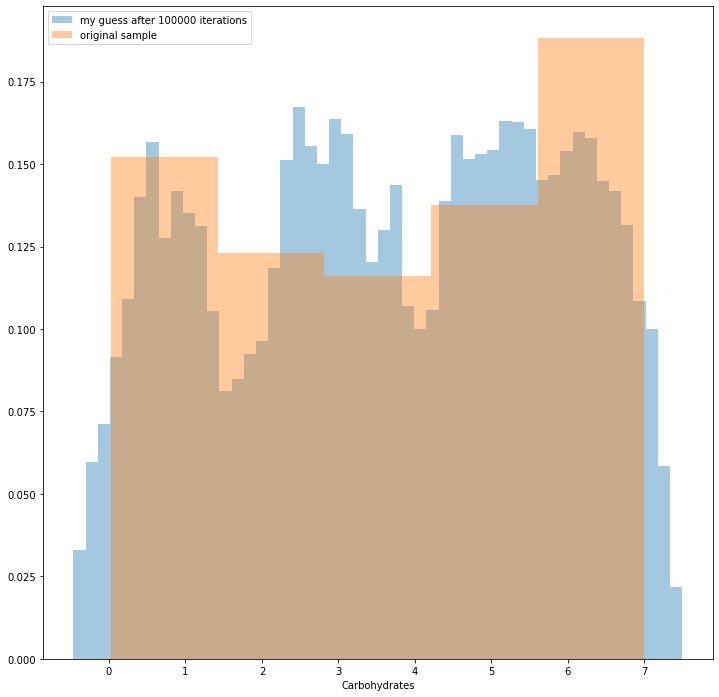

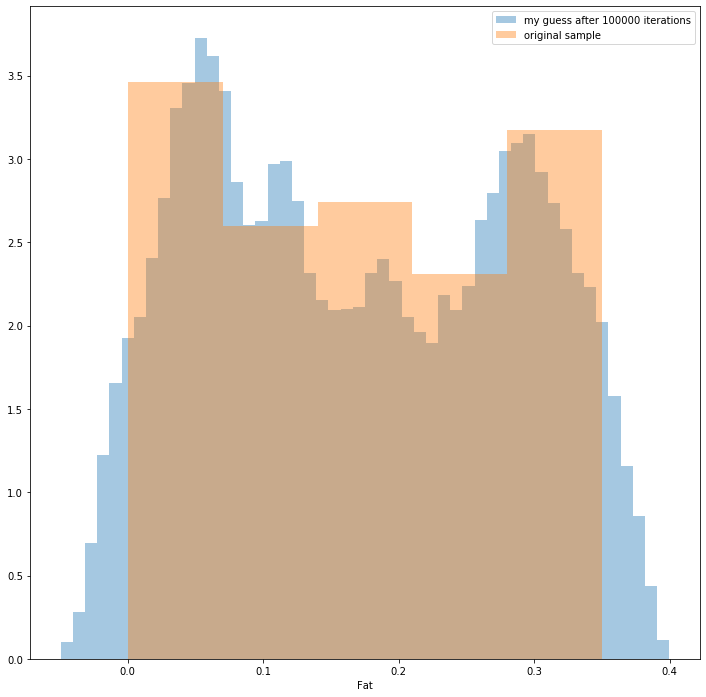

In [5]:
def mean(lst): 
    return sum(lst) / len(lst)

# I want to obtain the posterior distribution of my samples

iterations = 100000
# This are the initial guesses for the mean. They are arbitrary, changing them will affect the execution of the algorithm
current_prot = mean(prot) #- 0.5
current_carb = mean(carb) #- 1
current_fat = mean(fat) #- 0.05

# Record of the steps. It is a list of lists containing a list for each iteration. This lists are made of the values of the three variables explaining the model
all_steps_prot = []
all_steps_carb = []
all_steps_fat = []
# Record of the posterior distribution
all_currents_prot = []
all_currents_carb = []
all_currents_fat = []

for i in range(iterations):
    # Move randomly, forward or backwards, at a maximun distance of 0.5 or 0.05 in each direction, that is on the surfaces explained by the three variables
    # The different distances for the different variables are due to the scale of each one of them, the larger the scale the longer the distance.
    step_prot = (rand.random()/10) - 0.05
    step_carb = rand.random() - 0.5
    step_fat = (rand.random()/10)-0.05
    # The step that I will decide if I accept it or not
    candidate_current_prot = current_prot + step_prot
    candidate_current_carb = current_carb + step_carb
    candidate_current_fat = current_fat + step_fat
    
    p_actual_step_prot = len([sample for sample in prot if current_prot - 0.05 < sample and sample < current_prot + 0.05]) / float(len(prot))
    p_candidate_step_prot = len([sample for sample in prot if candidate_current_prot - 0.05 < sample and sample < candidate_current_prot + 0.05]) / float(len(prot))
    
    p_actual_step_carb = len([sample for sample in carb if current_carb - 0.5 < sample and sample < current_carb + 0.5]) / float(len(carb))
    p_candidate_step_carb = len([sample for sample in carb if candidate_current_carb - 0.5 < sample and sample < candidate_current_carb + 0.5]) / float(len(carb))
    
    p_actual_step_fat = len([sample for sample in fat if current_fat - 0.05 < sample and sample < current_fat + 0.05]) / float(len(fat))
    p_candidate_step_fat = len([sample for sample in fat if candidate_current_fat - 0.05 < sample and sample < candidate_current_fat + 0.05]) / float(len(fat))
    
    
    # If the new step is better, I always accept
    # If not, I accept it randomly
    if p_candidate_step_prot > p_actual_step_prot:
        current_prot = candidate_current_prot
    else:
        random_number = rand.random()
        if random_number <= p_candidate_step_prot / p_actual_step_prot:
            current_prot = candidate_current_prot
    
    if p_candidate_step_carb > p_actual_step_carb:
        current_carb = candidate_current_carb
    else:
        random_number = rand.random()
        if random_number <= p_candidate_step_carb / p_actual_step_carb:
            current_carb = candidate_current_carb
            
    if p_candidate_step_fat > p_actual_step_fat:
        current_fat = candidate_current_fat
    else:
        random_number = rand.random()
        if random_number <= p_candidate_step_fat / p_actual_step_fat:
            current_fat = candidate_current_fat
    
    
    # I record my step and where I'm standing
    all_currents_prot.append(current_prot)
    all_currents_carb.append(current_carb)
    all_currents_fat.append(current_fat)
    all_steps_prot.append(step_prot)
    all_steps_carb.append(step_carb)
    all_steps_fat.append(step_fat)
    
    

# If I plot all my standings, I will have the likelihood function of the mean of the data 
# (the parameter of the model that I'm inferring)
fig=plt.figure(figsize=(12, 12))
sn.distplot(all_currents_prot, kde=False, label="my guess after %s iterations" % iterations, norm_hist=True)
# And I compare them with the original samples
sn.distplot(prot, kde=False, label="original sample", norm_hist=True)
plt.legend()

fig2=plt.figure(figsize=(12, 12))
sn.distplot(all_currents_carb, kde=False, label="my guess after %s iterations" % iterations, norm_hist=True)
sn.distplot(carb, kde=False, label="original sample", norm_hist=True)
plt.legend()

fig3=plt.figure(figsize=(12, 12))
sn.distplot(all_currents_fat, kde=False, label="my guess after %s iterations" % iterations, norm_hist=True)
sn.distplot(fat, kde=False, label="original sample", norm_hist=True)
plt.legend()

The algorithm traverses the surface descibed by the model and computes the posterior distributions of the three variables. Finally it plots the result for the posterior distributions. Now, in order to infer the best values for the coeficients of the three variables of the model we would have to get the most common posterior value of the distribution. Since we said that the variables follow a normal distribution I would calculate the mean of the distributions (mu) as the sumatory of the product between all the values of a certain variable and the probability of them to appear. That means: **mu = E(x * p(x))**. 

In [9]:
def mu(lst):
    l = len(lst)
    p_dict = {}
    tmp = 0
    i = 0
    while i < (l-1):
        #calculate probability of each value with respect to the whole set and add it to the dictionary
        if not (lst[i] == lst[i+1]): 
            p = float(tmp/l)
            p_dict[lst[i]] = p
            tmp = 0
        else:
            tmp += 1
        i += 1
    
    #perform the sum of the product of the different values and the probability of each values that are contained in the dictionary
    mu = 0
    for i in p_dict:
        mu += float((i*p_dict[i]))
    
    return mu
    

prot_coeficient = mu(all_currents_prot)
carb_coeficient = mu(all_currents_carb)
fat_coeficient = mu(all_currents_fat)

print("The inferred coeficient for the protein variable of the model is:", prot_coeficient)
print("The inferred coeficient for the carbohidrate variable of the model is:", carb_coeficient)
print("The inferred coeficient for the fat variable of the model is:", fat_coeficient)

The inferred coeficient for the protein variable of the model is: 0.11488710394969694
The inferred coeficient for the carbohidrate variable of the model is: 0.29572450894559943
The inferred coeficient for the fat variable of the model is: 0.020410397400562663


Having inferred the coeficients of the variable, the only thing that is left to do is to consider and infer the error that the model describes.

In order to do so I will consider the standard errors of all the distributions and sum them. 

In [10]:
#calculate standard error
def standard_error(lst):
    m = mu(lst)
    var = 0
    n = len(lst)
    for i in lst:
        var = var + ((i-m)**2)
    sd = (var/(n-1))**0.5
    return sd/(n**0.5)
    
overall_error = standard_error(all_currents_prot) + standard_error(all_currents_carb) + standard_error(all_currents_fat)
print("The overall standard error for our posterior distributions is: ", overall_error)

The overall standard error for our posterior distributions is:  0.016335749974803134


### Assignment 1: Exercise 5

Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands.

Here functions for calculationg the probability of a generala are implemented.

In [ ]:
allRolls5Dice = lambda : [[a+1,b+1,c+1,d+1,e+1] for a in range (6)\
                                                for b in range (6)\
                                                for c in range (6)\
                                                for d in range (6)\
                                                for e in range (6)]

allRollsNDices = lambda n: [[a+1]+smallerRoll for a in range(6) for smallerRoll in allRollsNDices(n-1)] if n > 1 else [[a+1] for a in range(6)]

isGenerala = lambda roll: True if len(set(roll)) == 1 else False

p_served_generala = len([roll for roll in allRolls5Dice() if isGenerala(roll)]) / float(len(allRolls5Dice()))

notServedGeneralas = [roll for roll in allRolls5Dice() if not isGenerala(roll)]

waysOfChooseFromFiveDice = 5 + 5*4 + 5*4*3 + 5*4*3*2 + 5*4*3*2*1

First, a for loop computing the set of all the usefull pickups for the first throw of dice is implemented.
The result is a list containing all the usefull sets of dice that could help us to get a generala. 

In [ ]:
unUnsefulPickUpsCount = 0
usefulPickUps = []
for notServedGenerala in notServedGeneralas:
    for diceType in set(notServedGenerala):
        usefulPickUp = [dice for dice in notServedGenerala if dice == diceType]
        usefulPickUps.append(usefulPickUp)
        
        unUnsefulPickUpsCount += waysOfChooseFromFiveDice - len(usefulPickUp)
        
#print (len (usefulPickUps), unUnsefulPickUpsCount)

Second, the set of usefull pickups is used to calculate the probability of getting a generala after a second reroll.

In [ ]:
generalaCountAfterReroll = 0
notGeneralaCountAfterReroll = 0
for usefulPickUp in usefulPickUps:
    for reroll in allRollsNDices(5-len(usefulPickUp)):
        if isGenerala(usefulPickUp+reroll): generalaCountAfterReroll += 1
        else: 
            notGeneralaCountAfterReroll += 1
        
#print (generalaCountAfterReroll, notGeneralaCountAfterReroll)

p_generala_after_two_rolls = p_served_generala + ( generalaCountAfterReroll / (generalaCountAfterReroll+notGeneralaCountAfterReroll + unUnsefulPickUpsCount) )

Lastly, the same set of possible pickps is used for caclulating the probability of getting a generala after a third reroll.
The same set is used because we do not want to take in consideration any strategy while playing the game. For this reason we have to take in consideration all possible pickups, also those ones that would not apparently make sense. That means that we would consider again the whole set of pickups.

In [ ]:
generalaCountAfterLastReroll = 0
notGeneralaCountAfterLastReroll = notGeneralaCountAfterReroll
for usefulLastPickUp in usefulPickUps:
    for reroll in allRollsNDices(5-len(usefulPickUp)):
        if isGenerala(usefulLastPickUp+reroll): generalaCountAfterLastReroll += 1
        else: 
            notGeneralaCountAfterLastReroll += 1

#print (generalaCountAfterLastReroll, notGeneralaCountAfterLastReroll)
p_generala_after_three_rolls = p_generala_after_two_rolls + ( generalaCountAfterLastReroll / (generalaCountAfterLastReroll+notGeneralaCountAfterLastReroll + unUnsefulPickUpsCount) )
print("the prbability of getting a generala after three rerolls is :", p_generala_after_three_rolls)

The same can be done in order to compute the probabilities for all the other type of hands (poker, full, straight), we would just have to change the considitions of the if statements so that it would check for a full/poker/straight instead of a generala